<br />

<div style="text-align: center;">
<font size="7">数値計算試験問題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">2020/12/18 実施</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2020 </font>
</div>



# fitting(25点)

次のデータにフィットした二次関数を求め，データと同時に plot せよ.

``` python
import numpy as np

xdata = np.array([1,2,3,4])
ydata = np.array([1,8,9,10])
```

[-7.5 10.3 -1.5]


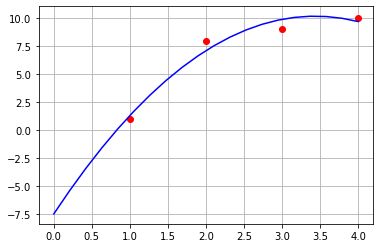

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

xdata = np.array([1,2,3,4])
ydata = np.array([1,8,9,10])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(0,4,20)
y = f(x,params[0],params[1],params[2])
plt.plot(x,y, color='b')

plt.grid()
plt.show()

# fsolve(25点)

次の関数
$$
f(x) = -\left(\frac{1}{x}\right)^6+2\,\left(\frac{1}{x}\right)^{12}
$$
は図に示す通り，解$1.1224620483093721$を持つ．
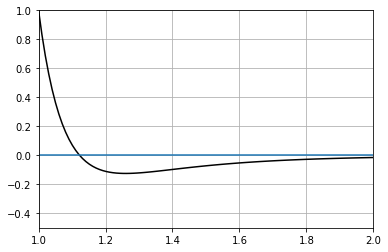

二分法とNewton法によって数値解を求めよ．
二分法の初期値は$x=1..2$，Newton法の初期値は$x=1$とし，
繰り返しは10回程度で求めよ．
収束の様子を片対数(logplot)で同時にプロットせよ．

与関数$f(x)$ の微分は
``` python
def df(x):
    return (6.0/x**7.0)-(24.0/x**13.0)
```
で与えられる．



In [2]:
import numpy as np

def func(x):
    return -(1.0/x**6.0)+(2.0/x**12.0)

def dfunc(x):
    return (6.0/x**7.0)-(24.0/x**13.0)


from scipy.optimize import fsolve
x0 = fsolve(func, 0.5)[0]
print(x0)

1.1224620483093721


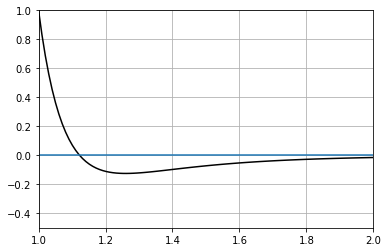

In [3]:
import matplotlib.pyplot as plt

x1=1.0
x2=2.0
x = np.linspace(x1, x2, 100)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot([x1,x2],[0,0])
plt.grid()
plt.xlim(1,2)
plt.ylim(-0.5,1)

plt.show()

In [4]:
x1, x2 = 1.0,2.0
f1, f2 = func(x1), func(x2)
print('%+15s %+15s %+15s %+15s'  % ('x1','x2','f1','f2'))
print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec = [[0],[abs(x1-x0)]]
for i in range(1, 10):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))

    print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))


print(list_bisec)

             x1              x2              f1              f2
  +1.0000000000   +2.0000000000   +1.0000000000   -0.0151367188
  +1.0000000000   +1.5000000000   +1.0000000000   -0.0723768019
  +1.0000000000   +1.2500000000   +1.0000000000   -0.1247050465
  +1.0000000000   +1.1250000000   +1.0000000000   -0.0066392349
  +1.0625000000   +1.1250000000   +0.2711684081   -0.0066392349
  +1.0937500000   +1.1250000000   +0.0982535242   -0.0066392349
  +1.1093750000   +1.1250000000   +0.0391079154   -0.0066392349
  +1.1171875000   +1.1250000000   +0.0147428721   -0.0066392349
  +1.1210937500   +1.1250000000   +0.0036996769   -0.0066392349
  +1.1210937500   +1.1230468750   +0.0036996769   -0.0015553491
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0.12246204830937213, 0.37753795169062787, 0.12753795169062787, 0.002537951690627871, 0.05996204830937213, 0.02871204830937213, 0.013087048309372129, 0.005274548309372129, 0.001368298309372129, 0.000584826690627871]]


In [5]:
x1 = 1.0
f1 = func(x1)
list_newton = [[0],[abs(x1-x0)]]
print('%-15.10f %+24.25f' % (x1,f1))
for i in range(1, 10):
    x1 = x1 - f1 / dfunc(x1)
    f1 =func(x1)
    print('%-15.10f %+24.25f' % (x1,f1))
    list_newton[0].append(i)
    list_newton[1].append(abs(x1-x0))

print(list_newton)

1.0000000000    +1.0000000000000000000000000
1.0555555556    +0.3223796640308458361090516
1.0970223960    +0.0846013312320794685916781
1.1178429553    +0.0128389747089051597939147
1.1222873605    +0.0004675783357422913510959
1.1224617904    +0.0000006894048536487673573
1.1224620483    +0.0000000000015049073098794
1.1224620483    -0.0000000000000001110223025
1.1224620483    -0.0000000000000001110223025
1.1224620483    -0.0000000000000001110223025
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0.12246204830937213, 0.06690649275381655, 0.025439652286961767, 0.004619092971890115, 0.0001746878229040849, 2.5794303071258184e-07, 5.622169396701793e-13, 8.881784197001252e-16, 8.881784197001252e-16, 8.881784197001252e-16]]


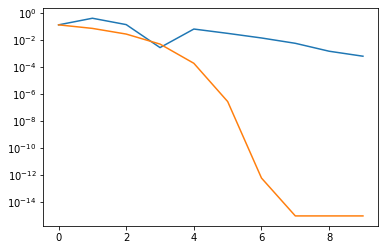

In [6]:
import matplotlib.pyplot as plt

X = list_bisec[0]
Y = list_bisec[1]
plt.plot(X, Y)

X = list_newton[0]
Y = list_newton[1]
plt.plot(X, Y)

plt.yscale("log") # y軸を対数目盛に
plt.show()

# ode - oscillation(25点)

Euler法を用いてバネ振動の常微分方程式を解く．

規格化したバネ定数$k$を0.001として，
刻み幅dtを0.1秒とした場合に200秒までの振る舞いを

``` python
def euler3(x0,v0):
  v1 = v0 +(- k * x0) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

t, dt, k=0.0, 0.1, 0.001
tt,xx,vv=[0.0],[0.0],[0.1]
for i in range(0,2000):
```
でplotしてみよ．

振動の周期$T$が
$$
f = \frac{1}{2\pi}\sqrt{\frac{k}{m}}
$$

$$
T = \frac{1}{f}
$$
と一致していることを確かめよ．

ただし，$k$は規格化しているので，$m=1$


また，規格化したバネ定数$k$を0.01とした時，周期はいくらになるか．
また，200秒まででだいたい何周期になるか

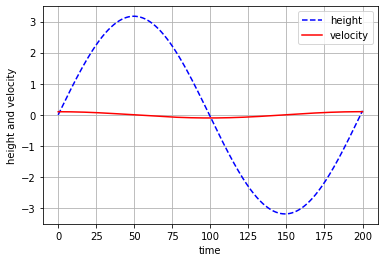

In [7]:
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="height")
    plt.plot(tt, vv, color = 'r', label="velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('height and velocity')
    plt.grid()
    plt.show()
    
def euler3(x0,v0):
  v1 = v0 +(- k * x0) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

t, dt, k=0.0, 0.1, 0.001
tt,xx,vv=[0.0],[0.0],[0.1]
for i in range(0,2000):
  t += dt
  x, v = euler3(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

In [8]:
1/(np.sqrt(0.001)/2/np.pi)

198.69176531592203

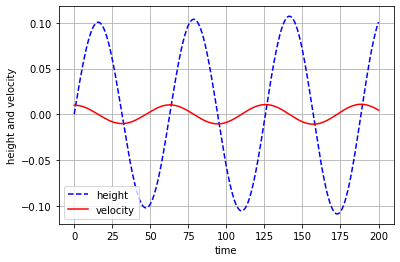

In [9]:
t, dt, k=0.0, 0.1, 0.01
tt,xx,vv=[0.0],[0.0],[0.01]
for i in range(0,2000):
  t += dt
  x, v = euler3(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

In [10]:
1/(np.sqrt(0.01)/2/np.pi)

62.83185307179586

In [11]:
200/62.831853 # だいたい３周期になる

3.1830988654751278

# fft(25点)

FFTによって周期62.831853のsin関数がどのように変換されるかを調べる．
```python
2*np.pi*(3*62.831853) = 1184
```
であることに注意して，
``` python
def func(x):
    return np.sin(x/62.831853)

x = np.linspace(0, 1184, 1184)
```
をx=0..1184で実空間で表示せよ．
FFTに入れるチャンネル数(通常は256など)が1184+1の場合，
パワースペクトル(spectrum_power, FFTをかけた後の周波数強度)を求めて表示せよ．
パワースペクトルのピーク位置が何を意味するかを述べよ．

In [12]:
3*62.831853

188.49555900000001

In [13]:
2*np.pi*188.495559

1184.3525267774028

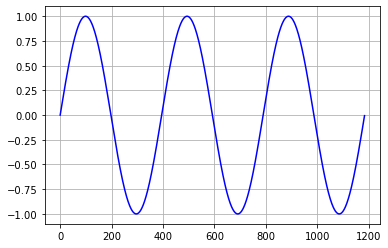

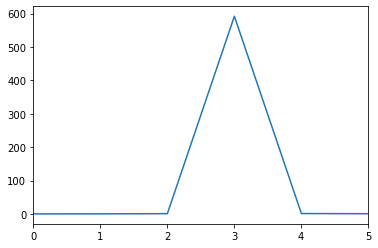

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

def func(x):
    return np.sin(x/62.831853)


x = np.linspace(0, 1184, 1184)
#x = np.linspace(0, 256, 256)


plt.plot(x, func(x), color = 'b')

plt.grid()
plt.show()

yy = func(x)
out = fft(yy)

def spectrum_power(x):
    re, im = x.real, x.imag
    return np.sqrt(re**2+im**2)

plt.plot(x,spectrum_power(out))
plt.xlim(0,5)
plt.show()


In [15]:
# 波の数